In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')

train_data.loc[train_data['Sex'] == 'male', 'Sex'] = 1
train_data.loc[train_data['Sex'] == 'female', 'Sex'] = 2
train_data = train_data.drop('Name', 1)
# train_data = train_data.drop('Ticket', 1)
train_data.loc[train_data['Embarked'] == 'S', 'Embarked'] = 1
train_data.loc[train_data['Embarked'] == 'C', 'Embarked'] = 2
train_data.loc[train_data['Embarked'] == 'Q', 'Embarked'] = 3
train_data["Embarked"].fillna(train_data["Embarked"].mean(), inplace = True) 
train_data = train_data.astype({"Embarked":float})
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null float64
dtypes: float64(3), int64(6), object(2)
memory usage: 76.7+ KB
None


In [3]:
train_data.describe()

PassengerId    Survived      Pclass         Sex         Age  \
count   891.000000  891.000000  891.000000  891.000000  714.000000   
mean    446.000000    0.383838    2.308642    1.352413   29.699118   
std     257.353842    0.486592    0.836071    0.477990   14.526497   
min       1.000000    0.000000    1.000000    1.000000    0.420000   
25%     223.500000    0.000000    2.000000    1.000000   20.125000   
50%     446.000000    0.000000    3.000000    1.000000   28.000000   
75%     668.500000    1.000000    3.000000    2.000000   38.000000   
max     891.000000    1.000000    3.000000    2.000000   80.000000   

            SibSp       Parch        Fare    Embarked  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.523008    0.381594   32.204208    1.362205  
std      1.102743    0.806057   49.693429    0.635442  
min      0.000000    0.000000    0.000000    1.000000  
25%      0.000000    0.000000    7.910400    1.000000  
50%      0.000000    0.000000   14.454200    1.000000  
75%      1.000000    0.000000   31.000000    2.000000  
max      8.000000    6.000000  512.329200    3.000000

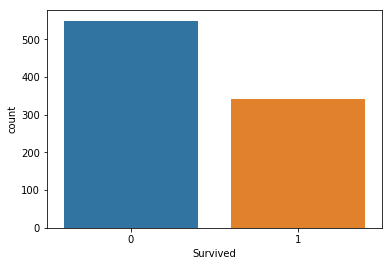

In [4]:
sns.countplot(x='Survived', data=train_data);

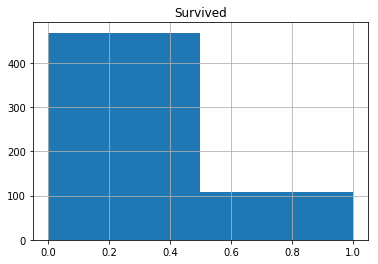

In [5]:
#men survival histogram
hist = train_data[train_data['Sex']==1].hist(column='Survived', bins=2)
#female survival histogram
hist = train_data[train_data['Sex']==2].hist(column='Survived', bins=2)

    PassengerId  Survived  Pclass  Sex    Age  SibSp  Parch  Ticket     Fare  \
21           22         1       2    1  34.00      0      0  248698  13.0000   
23           24         1       1    1  28.00      0      0  113788  35.5000   
74           75         1       3    1  32.00      0      0    1601  56.4958   
78           79         1       2    1   0.83      0      2  248738  29.0000   
81           82         1       3    1  29.00      0      0  345779   9.5000   

   Cabin  Embarked  
21   D56       1.0  
23    A6       1.0  
74   NaN       1.0  
78   NaN       1.0  
81   NaN       1.0  


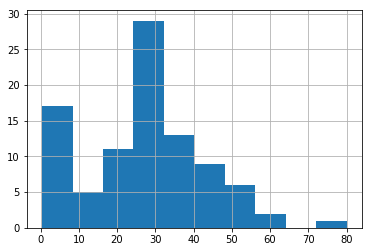

In [6]:
#male survivors distribution per age
#drop nan values
train_data_with_age = train_data.dropna(subset=['Age'])
male_survivors= train_data_with_age[(train_data_with_age['Sex']==1) & (train_data_with_age['Survived']==1)]
print(male_survivors.head())
male_survivors_age = male_survivors['Age']
hist = male_survivors_age.hist(bins=10)

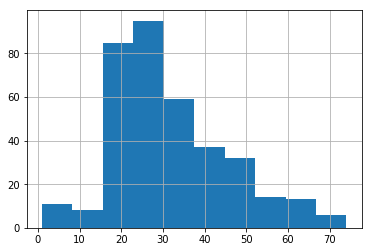

In [7]:
#males not-survivors distribution per age
male_not_survivors = train_data_with_age[(train_data_with_age['Sex']==1) & (train_data_with_age['Survived']==0)]
hist = male_not_survivors['Age'].hist(bins=10)

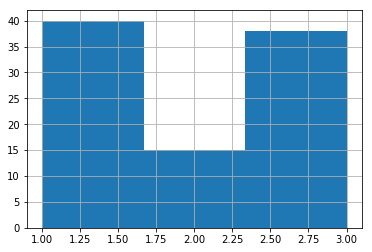

In [8]:
#male survivors distribution per seat class
male_survivors_pclass = male_survivors['Pclass']
hist = male_survivors_pclass.hist(bins=3)

       PassengerId  Survived      Pclass    Sex         Age       SibSp  \
count   360.000000     360.0  360.000000  360.0  360.000000  360.000000   
mean    445.516667       0.0    2.427778    1.0   31.618056    0.447222   
std     264.012091       0.0    0.765048    0.0   14.056019    0.983141   
min       1.000000       0.0    1.000000    1.0    1.000000    0.000000   
25%     203.750000       0.0    2.000000    1.0   21.750000    0.000000   
50%     441.000000       0.0    3.000000    1.0   29.000000    0.000000   
75%     686.250000       0.0    3.000000    1.0   39.250000    1.000000   
max     891.000000       0.0    3.000000    1.0   74.000000    5.000000   

            Parch        Fare    Embarked  
count  360.000000  360.000000  360.000000  
mean     0.238889   22.999871    1.208333  
std      0.640890   32.423259    0.498954  
min      0.000000    0.000000    1.000000  
25%      0.000000    7.895800    1.000000  
50%      0.000000   10.500000    1.000000  
75%      0.00000

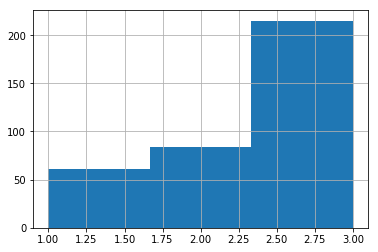

In [9]:
#males non-survivors distribution per seat class
hist = male_not_survivors['Pclass'].hist(bins=3)
print(male_not_survivors.describe())

We may notice from here that the largest proportion of males who didn't survived have 3rd class seats. Let's explore female survivors / non-survivors

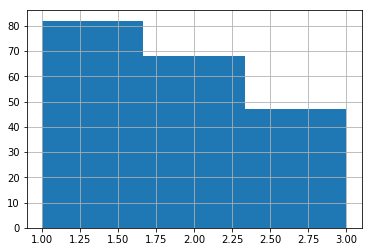

In [10]:
female_survivors= train_data_with_age[(train_data_with_age['Sex']==2) & (train_data_with_age['Survived']==1)]
hist = female_survivors['Pclass'].hist(bins=3)

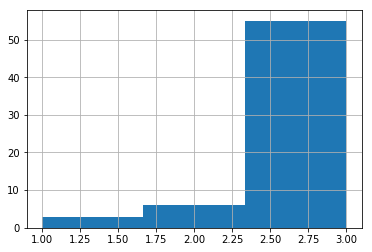

In [11]:
female_non_survivors= train_data_with_age[(train_data_with_age['Sex']==2) & (train_data_with_age['Survived']==0)]
hist = female_non_survivors['Pclass'].hist(bins=3)

As per the male population, the highest number of non-survivors in the female population is from class 3 seats.

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500       1.0
1            2         1       1    2  38.0      1      0  71.2833       2.0
2            3         1       3    2  26.0      0      0   7.9250       1.0
3            4         1       1    2  35.0      1      0  53.1000       1.0
4            5         0       3    1  35.0      0      0   8.0500       1.0


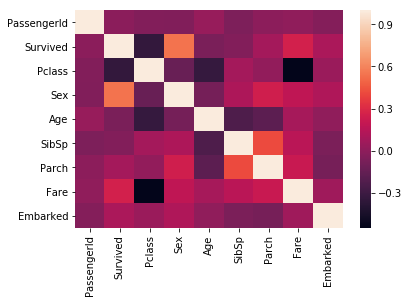

In [12]:
# fill NaN age data with mean
avg_age = train_data['Age'].mean()
train_data["Age"].fillna(avg_age, inplace = True) 
train_data.drop('Ticket', 1, inplace=True)
train_data.drop('Cabin', 1, inplace=True)
print(train_data.head())
corr = train_data.corr()
sns.heatmap(corr)

The highest correlations are between Pclass, Survived (label) and Fare --> drop Fare column

In [13]:
# train_data.drop('PassengerId', 1, inplace=True)
# train_data.drop('Embarked', 1, inplace=True)
# train_data.drop('Age', 1, inplace=True)

In [14]:
#Create a new feature for Parch and SipSp 
train_data['relatives'] = train_data['Parch'] + train_data['SibSp']
train_data.loc[train_data['relatives']>0, 'Accompanied'] = 1
train_data.loc[train_data['relatives']==0, 'Accompanied'] = 0
train_data.drop('SibSp',1, inplace=True)
train_data.drop('Parch',1, inplace=True)
train_data.drop('relatives',1, inplace=True)
print(train_data.head())

   PassengerId  Survived  Pclass  Sex   Age     Fare  Embarked  Accompanied
0            1         0       3    1  22.0   7.2500       1.0          1.0
1            2         1       1    2  38.0  71.2833       2.0          1.0
2            3         1       3    2  26.0   7.9250       1.0          0.0
3            4         1       1    2  35.0  53.1000       1.0          1.0
4            5         0       3    1  35.0   8.0500       1.0          0.0


In [15]:
# train_data.drop('Fare', 1, inplace=True)

In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler

X = train_data.drop('Survived', axis=1)
y = np.array(train_data['Survived'])

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

X = np.array(scaled_X)

from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5,test_size=0.2, random_state=42)

for train_index, test_index in sss.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators=130)
clf.fit(X_train, y_train)
y_pred3 = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[99 11]
 [24 45]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.65      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



In [18]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.model_selection import GridSearchCV

# parameters = {'n_estimators':[130, 145, 200], 'max_depth':[1, 2, 4, 8, 16, 32], 'max_features':[3, 4], 'criterion':['gini', 'entropy'], 'min_samples_split':[2, 3] }
# model = RandomForestClassifier()
# clf  = GridSearchCV(model, parameters, cv=None)
# clf.fit(X_train, y_train)
# print(clf.best_estimator_)

[[99 11]
 [24 45]]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       110
           1       0.80      0.65      0.72        69

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179



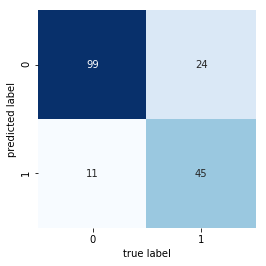

In [19]:
y_pred3 = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

mat = confusion_matrix(y_test, y_pred3)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');

In [20]:
print(clf.get_params)

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=130,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)>


In [21]:
#Gradient Boosting
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingClassifier

parameters = {'learning_rate':[0.01, 0.015, 0.02, 0.03], 'n_estimators':[90, 100, 120, 130, 140, 150], 'random_state':[42]}
model = GradientBoostingClassifier()
clf  = GridSearchCV(model, parameters, cv=None)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
y_pred5 = clf.predict(X_test)
print(classification_report(y_test, y_pred5))


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=120,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
              precision    recall  f1-score   support

           0       0.76      0.94      0.84       110
           1       0.84      0.52      0.64        69

    accuracy                           0.78       179
   macro avg       0.80      0.73      0.74       179
weighted avg       0.79      0.78      0.76       179

In [22]:
#Gradient Boosting with early stopping

from sklearn.metrics import mean_squared_error

gbrc = GradientBoostingClassifier(learning_rate=0.02, n_estimators=120, random_state=42)
gbrc.fit(X_train, y_train)
errors = [mean_squared_error(y_test, y_pred)
          for y_pred in gbrc.staged_predict(X_test)]
bst_n_estimators = np.argmin(errors) + 1
print(bst_n_estimators)
gbrc_best = GradientBoostingClassifier(learning_rate=0.02,n_estimators=bst_n_estimators)
gbrc_best.fit(X_train, y_train)
y_pred6 = gbrc_best.predict(X_test)
print(classification_report(y_test, y_pred6))

30
              precision    recall  f1-score   support

           0       0.76      0.95      0.84       110
           1       0.86      0.52      0.65        69

    accuracy                           0.78       179
   macro avg       0.81      0.73      0.75       179
weighted avg       0.80      0.78      0.77       179



In [23]:
import xgboost

xgb_clf = xgboost.XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred5 = xgb_clf.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       110
           1       0.79      0.59      0.68        69

    accuracy                           0.78       179
   macro avg       0.78      0.75      0.76       179
weighted avg       0.78      0.78      0.77       179

